Finite Element
========

A function $u(\vec x, t)$ can be approximated in this way: 

$u(\vec{x},t) \approx \sum_i a_i(t) \phi_i(\vec{x})$, 

where $\phi_i(\vec x)$ are a set of basis function. Now lets see this numericaly:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

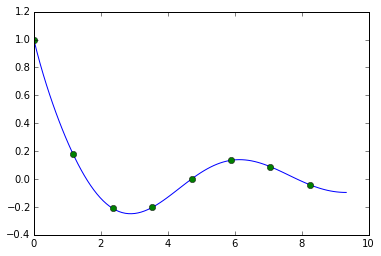

In [6]:
Ne = 8

#This is our exact function:
x = 3 * np.pi * np.arange(100)/100
u_original = np.cos(x)/(1+x)

plt.plot(x,u_original);

mesh = 3 * np.pi * np.arange(Ne)/Ne
u_mesh = np.cos(mesh)/(1+mesh)

plt.plot(mesh, u_mesh,'o');

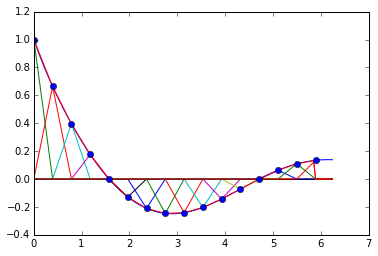

In [10]:
Ne = 16

mesh = 2 * np.pi * np.arange(Ne)/Ne
a = np.cos(mesh)/(1+mesh)


def phi(i,x):
    if i < (Ne-1):
        if mesh[i]<=x and x<mesh[i+1]:
            return (mesh[i+1]-x)/(mesh[i+1]-mesh[i])
    if i > 0:
        if mesh[i-1]<=x and x<mesh[i]:
            return (x-mesh[i-1])/(mesh[i]-mesh[i-1])
    return 0

def u(x,a):
    u_ = 0
    for i in range(len(a)):
        u_ += a[i] * phi(i,x)
    return u_

x = 2 * np.pi * np.arange(10*Ne)/(10*Ne)
#plt.plot(x,u(x))

plt.plot(x,np.cos(x)/(1+x))

for i in range(Ne):
    y = np.array([ a[i]*phi(i,z) for z in x])
    plt.plot(x,y)

y = np.array([ u(z,a) for z in x])
plt.plot(x,y, 'r')
plt.plot(mesh,a, 'bo')


$A \frac{d\vec a}{dt} + B \vec a = 0$

$A_{i,i-1} = A_{i,i+1} = \Delta x/6$ 

$A_{ii} = 2\Delta x/3$ 

$B_{i,i+1} = - B_{i-1,i} = -v/2$

$B_{ii} = 0$

In [57]:
Ne = 5
A = np.zeros((Ne,Ne))
B = np.zeros((Ne,Ne))
a = np.zeros(Ne)

i,j = np.indices(A.shape)

A[i==j] = 2/3
A[i == j+1] = 1/6
A[i == j-1] =1/6

B[i == j+1] = 1/2
B[i == j-1] = -1/2


In [51]:
A_inv = np.linalg.inv(A)
C = (v/dx) * A_inv.dot(B)

array([[ 0. , -0.5,  0. ,  0. ,  0. ],
       [ 0.5,  0. , -0.5,  0. ,  0. ],
       [ 0. ,  0.5,  0. , -0.5,  0. ],
       [ 0. ,  0. ,  0.5,  0. , -0.5],
       [ 0. ,  0. ,  0. ,  0.5,  0. ]])